In [1]:
from automata.fa.dfa import DFA
import memReq
import utils

We present some more examples by generating automata from regular expressions.
The syntax allowed for regular expressions can be found in paragraph "Regular Expressions" here https://pypi.org/project/automata-lib/.

To obtain a deterministic automaton as small as possible for your expression, you can use `utils.memory_ready_dfa_from_regex(regex)`, which returns the smallest automaton whose induced regular reachability and safety objectives are the same as the ones induced by language $\mathcal{L}(\texttt{regex})$.
Note that this automaton may not recognize exactly $\mathcal{L}(\texttt{regex})$, but it has the same induced objectives and it has at most as many states as the minimal automaton for $\mathcal{L}(\texttt{regex})$.

We first comment on the memory requirements of `caa*b`, which is recognized by a deterministic finite automaton with 5 states.
Some of the vocabulary we use in the comments comes from [the related paper](https://arxiv.org/abs/2210.09703).

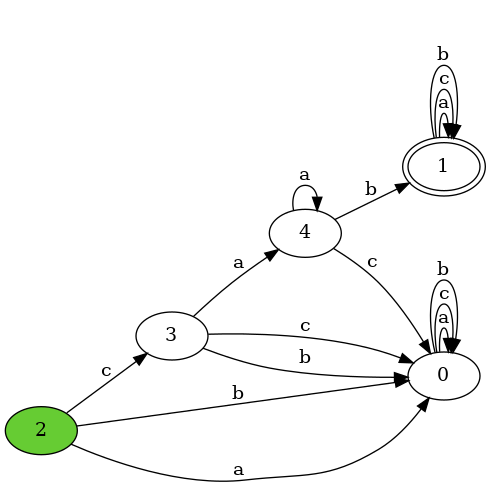

In [2]:
dfa = utils.memory_ready_dfa_from_regex("caa*b")
utils.view_dfa(dfa) # Requires that Graphviz is installed and that program 'dot' is on the PATH

We compute a smallest memory structure for the regular safety objective $\mathsf{Safe}(\mathcal{L}(\texttt{caa*b}))$, i.e., assuming that $\mathcal{P}_1$ wants to avoid seeing a word in `caa*b`.
There exists a memory structure for this with just two states: after the first letter is seen, either the game is won (if the first letter was `a` or `b`) or we still have to avoid `aa*b` (if the first letter was `c`).
States that recognize `aa*b` are totally ordered by $\preceq$, so just one extra state of memory suffices in this case.

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.
\Gamma_0 = ['0', '3', '4', '1']
\Gamma_1 = ['2', '1']


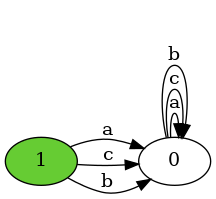

In [3]:
M = memReq.smallest_memory_safety(dfa)
utils.view_dfa(M)

We compute a smallest memory structure for the regular reachability objective $\mathsf{Reach}(\mathcal{L}(\texttt{caa*b}))$, i.e., assuming that $\mathcal{P}_1$ wants to see a word in `caa*b`.
There exists a memory structure for this with three states: we still need to distinguish the first letter (for the same reason as in the safety case), but then if `c` is first seen, we still need to distinguish the progress that an `a` brings.
Indeed, seeing an `a` makes progress and is necessary to win, but repeating `a` does not win, so the memory state needs to change.

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.
Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.


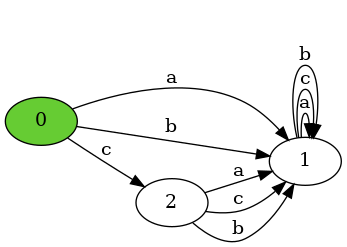

In [4]:
M = memReq.smallest_memory_reachability(dfa)
utils.view_dfa(M)

We now provide a few more examples of regular expressions.

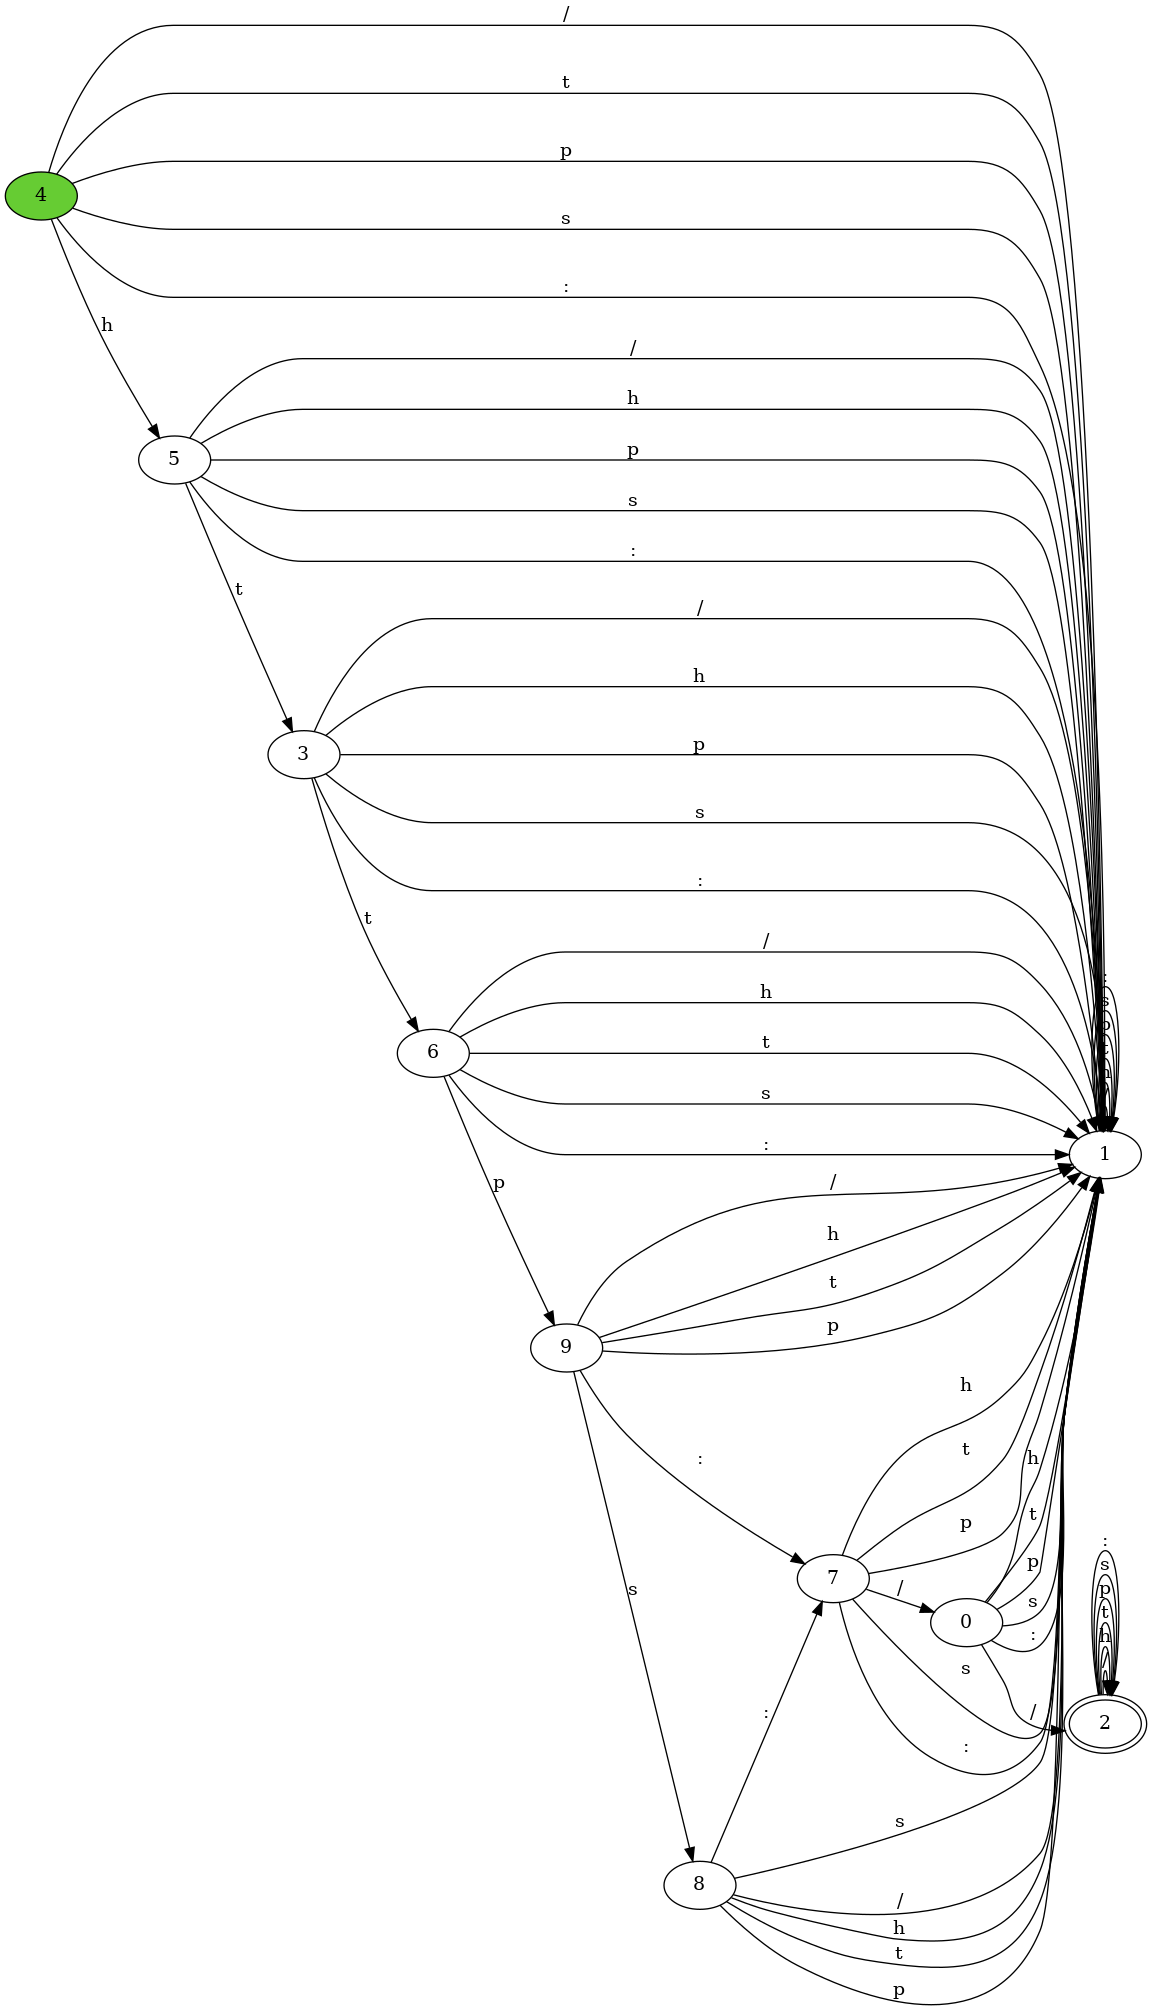

In [5]:
dfa = utils.memory_ready_dfa_from_regex("https?://")
utils.view_dfa(dfa)

Trying with 5 states...
SAT encoding finished with 5 states, solving...
Solved! Not possible with 5 states.
Trying with 7 states...
SAT encoding finished with 7 states, solving...
Solved! Possible with 7 states.
Trying with 6 states...
SAT encoding finished with 6 states, solving...
Solved! Possible with 6 states.
\Gamma_0 = ['4', '2']
\Gamma_1 = ['1', '7', '0', '2']
\Gamma_2 = ['5', '2']
\Gamma_3 = ['6', '2']
\Gamma_4 = ['3', '2']
\Gamma_5 = ['1', '8', '9', '2']


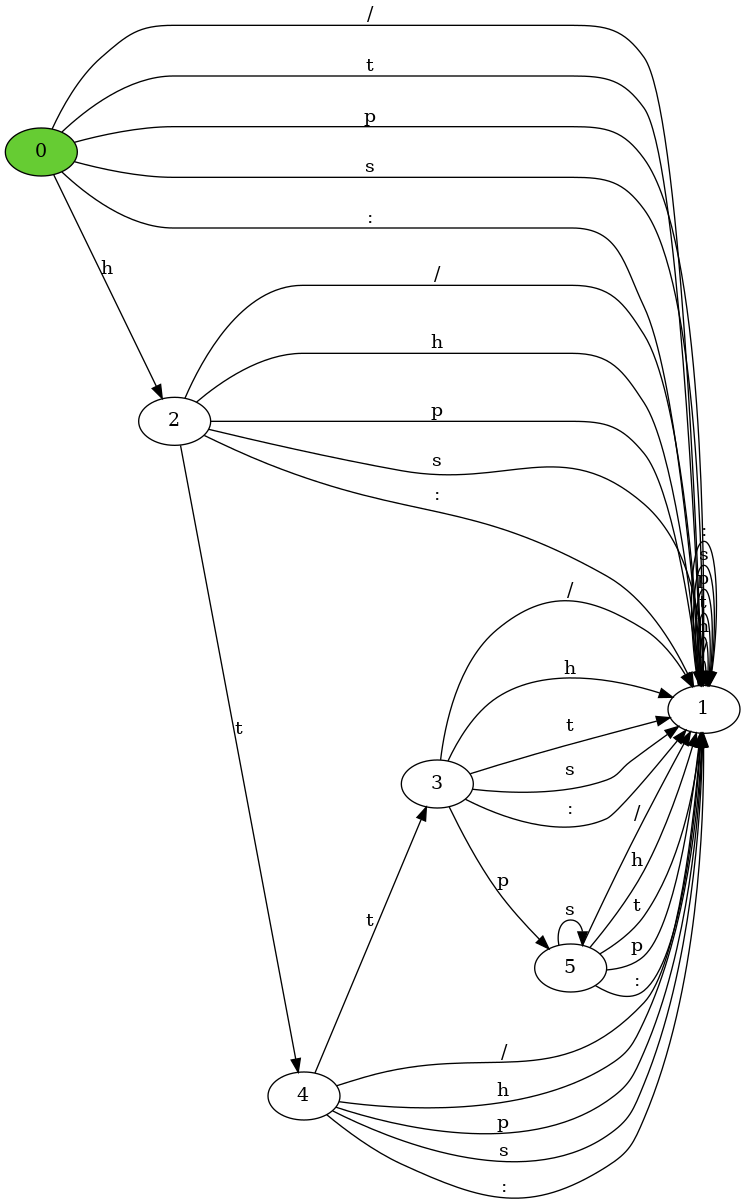

In [6]:
M = memReq.smallest_memory_safety(dfa)
utils.view_dfa(M)

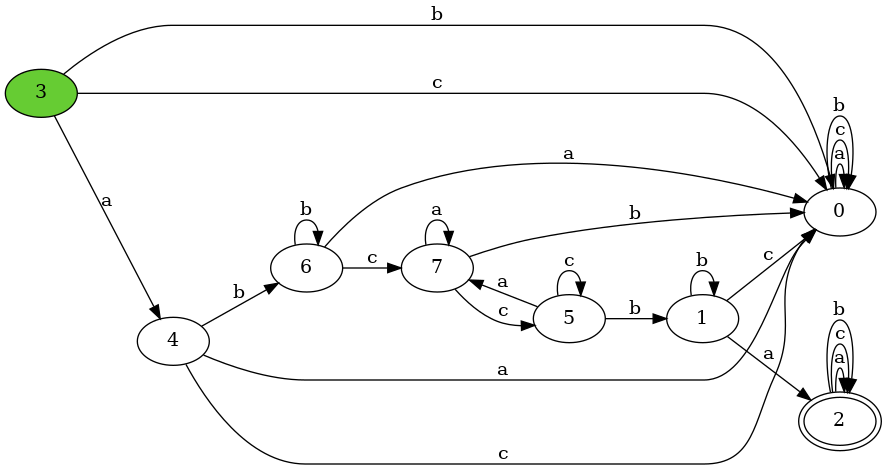

In [7]:
dfa = utils.memory_ready_dfa_from_regex("abb*c(a|c)*cbb*a")
utils.view_dfa(dfa)

Trying with 4 states...
SAT encoding finished with 4 states, solving...
Solved! Possible with 4 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.
Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
\Gamma_0 = ['0', '7', '5', '2']
\Gamma_1 = ['0', '4', '6', '2']
\Gamma_2 = ['0', '3', '1', '2']


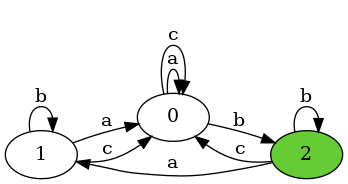

In [8]:
M = memReq.smallest_memory_safety(dfa)
utils.view_dfa(M)

Trying with 4 states...
SAT encoding finished with 4 states, solving...
Solved! Not possible with 4 states.
Trying with 6 states...
SAT encoding finished with 6 states, solving...
Solved! Possible with 6 states.
Trying with 5 states...
SAT encoding finished with 5 states, solving...
Solved! Possible with 5 states.


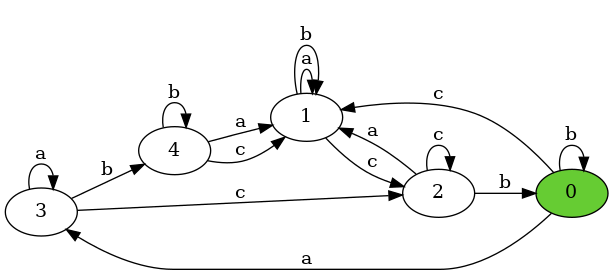

In [9]:
M = memReq.smallest_memory_reachability(dfa)
utils.view_dfa(M)

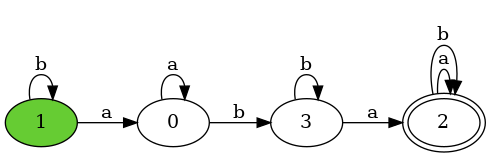

In [10]:
aba = utils.memory_ready_dfa_from_regex("b*aa*bb*a")
utils.view_dfa(aba)

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.


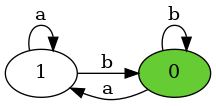

In [11]:
M = memReq.smallest_memory_reachability(aba)
utils.view_dfa(M)

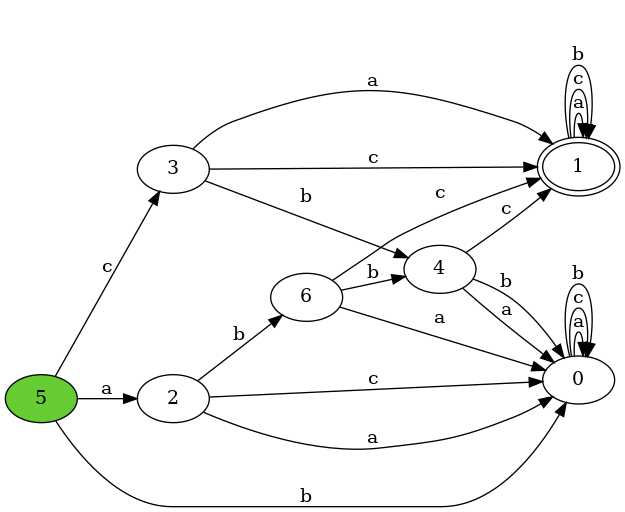

In [12]:
dfa = utils.memory_ready_dfa_from_regex("((ab|c)b?c)|ca")
utils.view_dfa(dfa)

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.


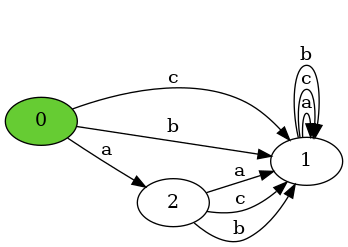

In [13]:
M = memReq.smallest_memory_reachability(dfa)
utils.view_dfa(M)

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.
\Gamma_0 = ['0', '4', '6', '3', '1']
\Gamma_1 = ['2', '1']
\Gamma_2 = ['5', '3', '1']


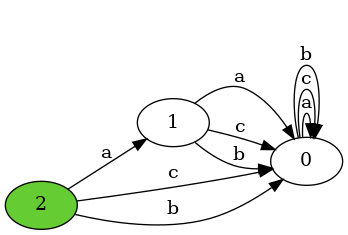

In [14]:
M = memReq.smallest_memory_safety(dfa)
utils.view_dfa(M)